This script calculates and plots the solution for the electric potential between to conductor plates at y = 0 and y = a. 

The boundary conditions are:

$(i) V(y=0) = 0$

$(ii) V(y=a) = 0$

$(iii) V(x=0) = V_0$

$(iv) V(x \to \infty) = 0$

Using Laplace equation and the separation of variables method, the potential is given by:

$$V(x, y) = \frac{4V_0}{\pi}\sum_{n~\text(impar)}^{\infty}\frac{1}{n}\exp\left(-\frac{n\pi}{a}x\right)\sin\left(\frac{n\pi}{a}y\right)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use("relatorio")


In [2]:
NumTerms = 100
n = [2*l + 1 for l in range(NumTerms)]

n

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179,
 181,
 183,
 185,
 187,
 189,
 191,
 193,
 195,
 197,
 199]

In [3]:
## X and Y are x/a and y/a, respectively
X = np.linspace(0, 1, 50)

X, Y = np.meshgrid(X, X)

In [4]:
## V is normalized by V0
V = np.zeros_like(X)

for N in n:
    V += (np.exp(-N*np.pi*X)*np.sin(N*np.pi*Y)/N)

V = 4/np.pi*V

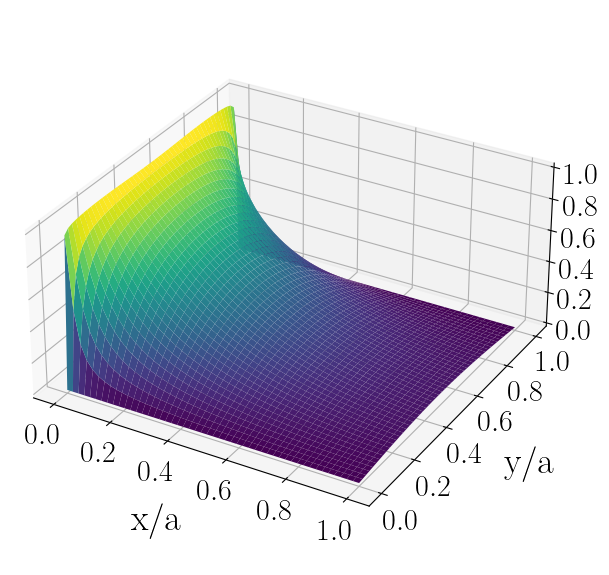

In [5]:
f = plt.figure()

xs =2
ys =2
zs =1
ax = f.add_subplot(111, projection='3d')

ax.set_box_aspect((xs, ys, zs))  # aspect ratio is 1:1:1 in data space
# ax.plot_wireframe(X, Y, V)
ax.plot_surface(X, Y, V, cmap="viridis")

ax.set_xlabel("x/a", labelpad=20)
ax.set_ylabel("y/a", labelpad=20)
ax.set_zlabel("V/V0", labelpad=20, rotation=90)

# ax.dist = 12
f.tight_layout()

plt.savefig('Potential.png', dpi=300, transparent=True)


For $x=0:$

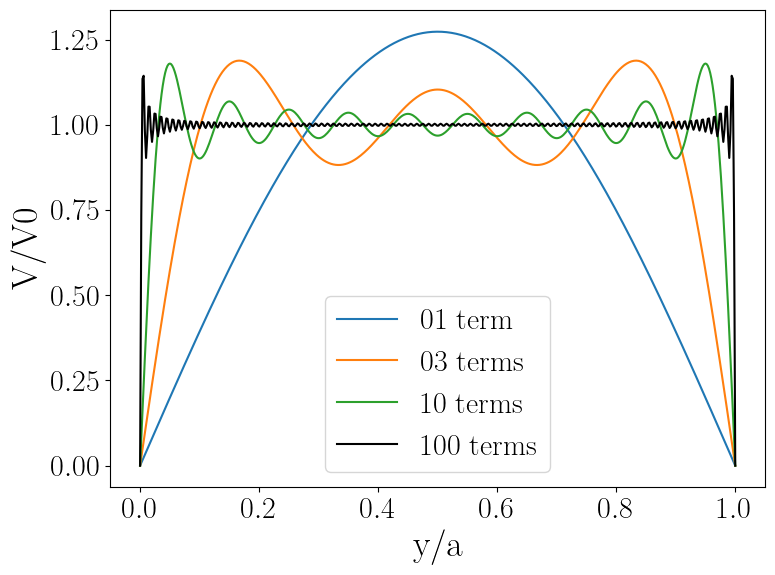

In [12]:
##  Y is y/a
Y = np.linspace(0, 1, 500)


## V is normalized by V0
V = np.zeros_like(Y)
f, ax = plt.subplots()

for iN, N in enumerate(n):
    V += 4/np.pi*np.sin(N*np.pi*Y)/N
    
    if iN == 0:
        ax.plot(Y, V, label = "01 term")

    if iN == 2:
        ax.plot(Y, V, label = "03 terms")

    if iN == 9:
        ax.plot(Y, V, label = "10 terms")



ax.plot(Y, V, "k", label=str(NumTerms) + " terms")

ax.legend()
ax.set_xlabel("y/a")
ax.set_ylabel("V/V0")

f.tight_layout()

plt.savefig('Terms.png', dpi=300, transparent=True)

